In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.1.0


In [2]:
source_data = pd.read_csv('./气候数据集/DailyDelhiClimateTrain.csv')

生成数据与时间,只对平均气温进行预测

In [3]:
time = source_data['date'].values
data = source_data.drop(['date'],axis=1).values # (1462,4)

### 划分验证集和训练集

In [4]:
valid_time = time[1000:]
valid_data = data[1000:]
train_time = time[:1000]
train_data = data[:1000]

In [140]:
def data_generator(data, window_size=5, shift=1, stride=1,shuffle_buffer=300,batch_size=64):
    """
    data: 数据集
    window_size: 窗口的尺寸
    shift: 窗口的移动单位
    stride: 取的数据的间隔
    shuffle_buffer: 对数据进行随机采样
    batch_size: 一次取多少个windows作为size
    """
    dataset = tf.data.Dataset.from_tensor_slices(data)
    dataset = dataset.window(window_size + 1, shift=shift, drop_remainder=True,stride=stride)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [141]:
windows_dataset = data_generator(train_data)
# 获取窗口的batch数据集,然后使用lambda函数获取标签
# for features, label in windows_dataset.take(1):
#     print(features.numpy().shape, " => ", label.numpy())

(64, 5, 4)  =>  [[2.84000000e+01 8.36000000e+01 5.18000000e+00 9.96400000e+02]
 [2.98750000e+01 8.38750000e+01 9.00000000e+00 9.99000000e+02]
 [1.25000000e+01 7.66666667e+01 5.88333333e+00 1.02166667e+03]
 [3.53333333e+01 2.90000000e+01 8.33333333e+00 1.00016667e+03]
 [3.48333333e+01 4.73333333e+01 5.86666667e+00 9.95333333e+02]
 [2.10000000e+01 6.20000000e+01 1.85000000e+00 1.00900000e+03]
 [2.95000000e+01 8.15000000e+01 8.35000000e+00 1.00100000e+03]
 [2.83333333e+01 8.38333333e+01 1.23333333e+00 1.00016667e+03]
 [3.01666667e+01 3.05000000e+01 8.65000000e+00 1.00533333e+03]
 [2.87142857e+01 3.38571429e+01 5.30000000e+00 1.00600000e+03]
 [2.48750000e+01 6.36250000e+01 1.38750000e+00 1.00987500e+03]
 [2.34285714e+01 5.81428571e+01 1.74571429e+01 1.00942857e+03]
 [1.22500000e+01 6.70000000e+01 5.55000000e+00 1.02075000e+03]
 [3.22857143e+01 6.74285714e+01 6.08571429e+00 9.98142857e+02]
 [2.73750000e+01 5.01250000e+01 9.95000000e+00 1.00762500e+03]
 [1.47142857e+01 7.18571429e+01 5.28571

In [47]:
windows_dataset

<MapDataset shapes: ((None, 4), (4,)), types: (tf.float64, tf.float64)>

### 模型调教

In [162]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(5,4)),
    tf.keras.layers.Dense(64, activation="relu"), 
    tf.keras.layers.Dense(32, activation="softmax"), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4)
])

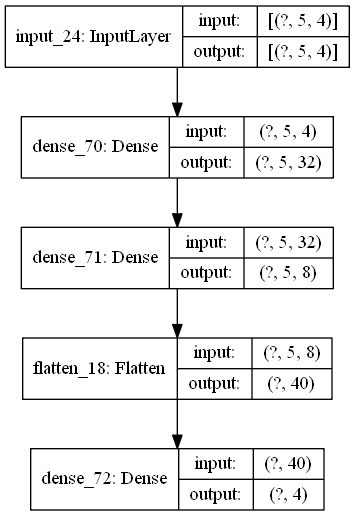

In [131]:
keras.utils.plot_model(model, show_shapes=True)

In [164]:
model.compile(loss="mse",  optimizer='sgd',metrics=['mae'])
history = model.fit(windows_dataset,epochs=200)

Epoch 1/200
16/16 [==============================] - 1s 44ms/step - loss: 163172.6865 - mae: 214.3395
Epoch 2/200
16/16 [==============================] - 0s 8ms/step - loss: 61651.1600 - mae: 132.8524
Epoch 3/200
16/16 [==============================] - 0s 8ms/step - loss: 23338.4077 - mae: 83.3686
Epoch 4/200
16/16 [==============================] - 0s 8ms/step - loss: 8872.7754 - mae: 53.2945
Epoch 5/200
16/16 [==============================] - 0s 8ms/step - loss: 3415.8808 - mae: 34.9590
Epoch 6/200
16/16 [==============================] - 0s 8ms/step - loss: 1355.1816 - mae: 23.7286
Epoch 7/200
16/16 [==============================] - 0s 9ms/step - loss: 580.8180 - mae: 16.8873
Epoch 8/200
16/16 [==============================] - 0s 9ms/step - loss: 287.2648 - mae: 12.6790
Epoch 9/200
16/16 [==============================] - 0s 9ms/step - loss: 175.7824 - mae: 10.0928
Epoch 10/200
16/16 [==============================] - 0s 9ms/step - loss: 133.7425 - mae: 8.6086
Epoch 11/200
16/1

### 结果分析

In [124]:
history.history

{'loss': [108.12039169234846,
  108.10548332636081,
  108.08363339984837,
  108.08822583529218,
  108.08713389641076,
  108.08960005410353,
  108.07955845205029,
  108.07840093104683,
  108.06816890850737,
  108.07551337774075,
  108.07619866989366,
  108.08510489919078,
  108.0790504033841,
  108.07531541220507,
  108.07917871523144,
  108.07720172057799,
  108.07285028773936,
  108.06988183409725,
  108.07436006248896,
  108.07315150888721,
  108.08049203690572,
  108.07954791658487,
  108.07517467862996,
  108.07814634696922,
  108.07562554134196,
  108.06411723227956,
  108.07401159851995,
  108.06644144489537,
  108.0704783147304,
  108.07548591958817],
 'mae': [7.6750784,
  7.6727943,
  7.6699615,
  7.6702127,
  7.6714063,
  7.6698585,
  7.6706495,
  7.670516,
  7.6699095,
  7.670584,
  7.6699347,
  7.66953,
  7.6698575,
  7.6704154,
  7.671042,
  7.6693335,
  7.668404,
  7.6675754,
  7.667406,
  7.665987,
  7.667576,
  7.6672397,
  7.6687775,
  7.669487,
  7.666931,
  7.666814,


In [95]:
forecast = []
for t in range(len(time) - 5):
    forecast.append(model.predict(data[t:t + 5][np.newaxis]))

forecast = forecast[1000-5:]
# results = np.array(forecast)[:, 0, 0]

ValueError: Error when checking input: expected input_15 to have 3 dimensions, but got array with shape (5, 4)

In [94]:
forecast

[array([[  25.529276 ,   60.786915 ,    6.9277954, 1007.6183   ]],
       dtype=float32),
 array([[  25.529276 ,   60.786915 ,    6.9277954, 1007.6183   ]],
       dtype=float32),
 array([[  25.529276 ,   60.786915 ,    6.9277954, 1007.6183   ]],
       dtype=float32),
 array([[  25.529276 ,   60.786915 ,    6.9277954, 1007.6183   ]],
       dtype=float32),
 array([[  25.529276 ,   60.786915 ,    6.9277954, 1007.6183   ]],
       dtype=float32),
 array([[  25.529276 ,   60.786915 ,    6.9277954, 1007.6183   ]],
       dtype=float32),
 array([[  25.529276 ,   60.786915 ,    6.9277954, 1007.6183   ]],
       dtype=float32),
 array([[  25.529276 ,   60.786915 ,    6.9277954, 1007.6183   ]],
       dtype=float32),
 array([[  25.529276 ,   60.786915 ,    6.9277954, 1007.6183   ]],
       dtype=float32),
 array([[  25.529276 ,   60.786915 ,    6.9277954, 1007.6183   ]],
       dtype=float32),
 array([[  25.529276 ,   60.786915 ,    6.9277954, 1007.6183   ]],
       dtype=float32),
 array([[ 